<a href="https://colab.research.google.com/github/MHSSCE/IPMV/blob/main/IPMV_PRAC_03_5221050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color, io
figsize=(10,10)

In [2]:
uploaded = files.upload()

Saving download.png to download.png


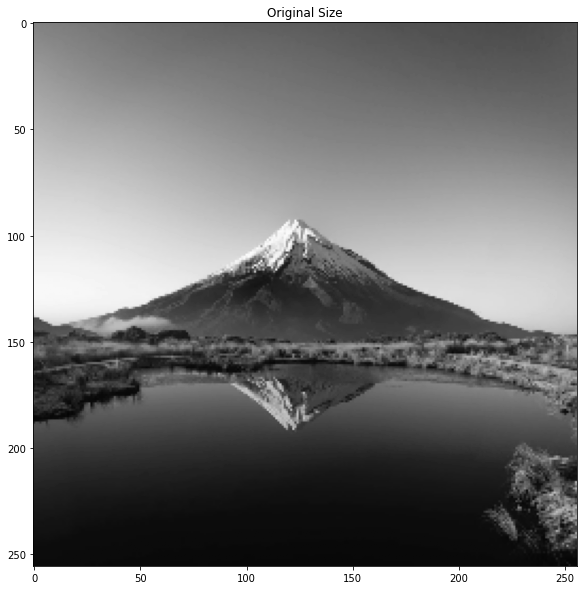

In [8]:
im = cv2.imread("/content/download.png")
im = cv2.resize(im, (256,256))
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(im, cmap="gray", vmin=0, vmax=256)
plt.title("Original Size")
plt.show()

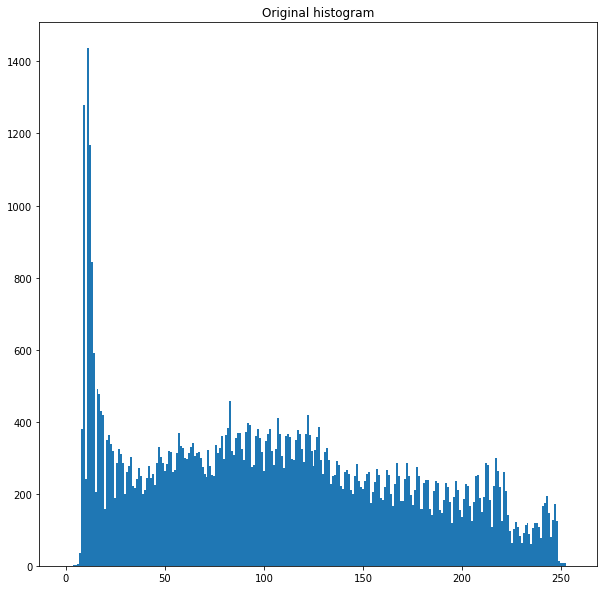

In [10]:
bins_edges_min_max=[0,256] 
num_bins=256 
bins_count1,bins_edges1=np.histogram(im,num_bins,bins_edges_min_max) 
bins_startl= bins_edges1[:-1] 

def draw_hist(x_axis,input): 
    fig, ax = plt.subplots(figsize=figsize) 
    plt.bar(x_axis,input,256/(x_axis[-1]-x_axis[0]+1)) 
    return fig,
    ax
    
draw_hist(bins_startl,bins_count1) 
plt.title("Original histogram") 
plt.show() 


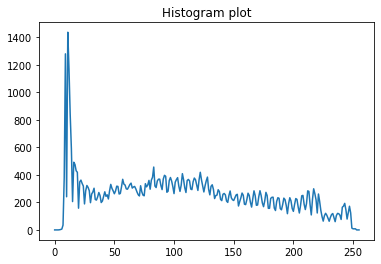

In [11]:
I=np.zeros(256,np.int32) 
for i in range(256): 
    for j in range(256): 
        r=im[i][j] 
        I[r]=I[r]+1 
plt.title("Histogram plot") 
plt.plot(I)

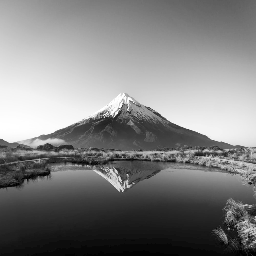

In [12]:
pd=np.zeros(256) 

for ii in range(256): 
    pd[ii]=I[ii]/(256*256)

cdf=np.cumsum(pd) 
f_eq=np.round(cdf*255).astype(int) 
I1_eq=f_eq[im] 
im1=np.zeros([256,256]) 

for i1 in range(256): 
    for j1 in range(256): 
        rr=im[i1][j1] 
        im1[i1][j1]=f_eq[rr] 

cv2_imshow(im1)

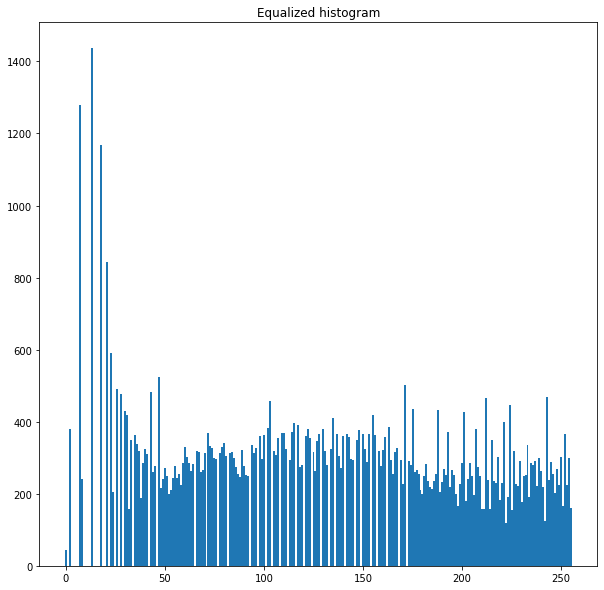

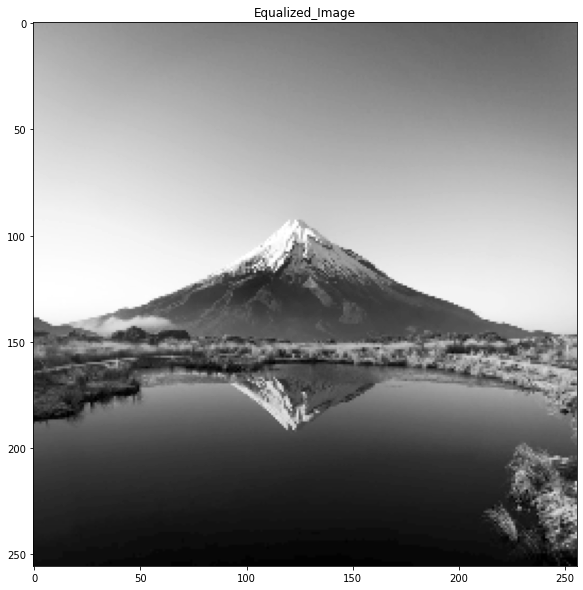

In [13]:
bins_edges_min_max=[0,256] 
num_bins=256 
bins_count,bins_edges=np.histogram(I1_eq,num_bins,bins_edges_min_max) 
bins_start= bins_edges[:-1] 
draw_hist(bins_start,bins_count) 
plt.title("Equalized histogram") 
plt.show() 
plt.figure(figsize=figsize) 
plt.imshow(I1_eq,cmap="gray",vmin=0,vmax=255) 
plt.title("Equalized_Image") 
plt.show() 